<a href="https://colab.research.google.com/github/BalandinAndrew/kursk2022july/blob/main/Kursk_kolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ludwig==0.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 388 kB 5.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 671.4 MB 15 kB/s 
     |████████████████████████████████| 1.1 MB 55.6 MB/s 
     |████████████████████████████████| 140 kB 71.6 MB/s 
     |████████████████████████████████| 48 kB 5.3 MB/s 
     |████████████████████████████████| 96 kB 6.3 MB/s 
     |████████████████████████████████| 463 kB 71.6 MB/s 
     |████████████████████████████████| 1.3 MB 65.7 MB/s 
  Created wheel for ludwig: filename=ludwig-0.4.1-py3-none-any.whl size=489346 sha256=ed5df162b80d88eeb8233a6dd8407cd93ae6a5d6b30d0da982f55816bb291e44
  Stored in directory: /root/.cache/pip/wheels/33/67/45/5268c7c349acccc114f07d92b57f2db50d627531ad1b727523
Successfully built ludwig
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 44.8 MB/s 
     |████████████████████████████████| 101 kB 11.4 MB/s 
     |████████████████████████████████| 596 kB 78.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from ludwig.api import LudwigModel
from ludwig.visualize import learning_curves
import yaml
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими


In [4]:
train = pd.read_csv('train_dataset_train_predobr.csv')
train

,id,Message text,Текст Сообщения,Тематика,Ответственное лицо,Категория
0,2246,Help the head of the Lgovsky RES does not resp...,Помогите начальник Льговского рэс не реагирует...,"Нарушения, связанные с содержанием электросети...",Администрация Льговского района,3
1,380,On the facade of the house at st. Uritskogo 22...,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,Аварийные деревья,Администрация города Курска,3
2,2240,Aggressive dogs. On the rainbow there is a flo...,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1
3,596,At the intersection of Sosnovskaya and Beregov...,<p>На пересечении &nbsp;улиц Сосновская и Бере...,Нескошенная сорная растительность в местах общ...,Комитет дорожного хозяйства города Курска,3
4,1797,"Hello! Near the house 1 ""A"" on Svetlaya Street...",<p style=`text-align:justify;`><span style=`ba...,Аварийные деревья,Комитет городского хозяйства города Курска,3
...,...,...,...,...,...,...
1995,1356,12/22/21 in the evening there was a stink from...,<p>22.12.21 в вечернее время появилась вонь от...,Неприятные запахи,Комитет природных ресурсов Курской области,16
1996,243,Good afternoon! I want to report such a proble...,<p>Добрый день! Хочу сообщить о такой проблеме...,Парковки на дорогах в границах городских округ...,Администрация города Курска,0
1997,2350,There are 3 withered trees (2 large birches an...,Состоят 3 засохшие дерева (2 большие берёзы и...,Аварийные деревья,Администрация города Курска,3
1998,1937,"Please roman Vladimirovich, soon here on a.d. ...","Пожалуйста роман Владимирович, в скором времен...",Нарушение дорожного покрытия (ямы) на дорогах...,Администрация города Курска,0


In [5]:
test = pd.read_csv('test_dataset_test_predobr.csv')
test

,id,Message text
0,843,"Hello. On Mira Street, outdoor lighting was re..."
1,1422,The street lighting has not been on for two we...
2,2782,The lighting in the courtyard of the house 11a...
3,2704,After mowing weeds on the lawn between the sid...
4,1,I ask you to take action against the driver of...
...,...,...
995,2619,Good afternoon! My family and I are residents ...
996,2518,"On Lazarev 5, Shchigry, a poplar branch will s..."
997,2524,In front of the entrance to the Committee of E...
998,1577,Good day I had a medical exemption from vaccin...


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2000 non-null   int64 
 1   Message text        2000 non-null   object
 2   Текст Сообщения     2000 non-null   object
 3   Тематика            2000 non-null   object
 4   Ответственное лицо  2000 non-null   object
 5   Категория           2000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 93.9+ KB


Text(0, 0.5, 'Counts')

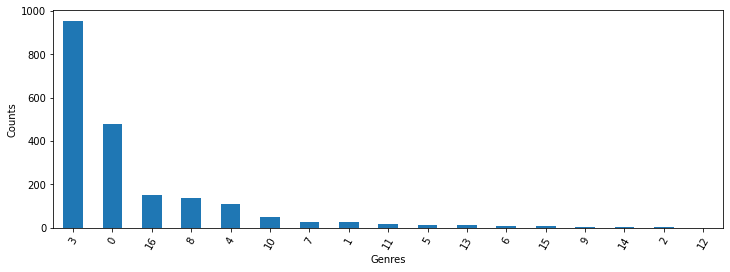

In [7]:
train['Категория'].value_counts().plot(kind='bar',figsize=(12,4),fontsize=10)
plt.xticks(rotation=60)
plt.xlabel("Genres",fontsize=10)
plt.ylabel("Counts",fontsize=10)

In [8]:
train['Категория'].value_counts()

3     954
0     478
16    149
8     139
4     108
10     48
7      27
1      25
11     19
5      12
13     11
6      10
15      7
9       5
14      4
2       3
12      1
Name: Категория, dtype: int64

In [9]:
train['Kategory']=3

In [10]:
# Первое ограничение - по значению 3. Раздел по 2-м вариантам (возможно перевести в бинарное с усилением 1)
train.loc[(train['Категория']!=3),'Kategory']='Another'

In [11]:
train['Kategory'].value_counts()

Another    1046
3           954
Name: Kategory, dtype: int64

In [12]:
config = {
    "input_features": [
        {
            "name": "Message text",
            "type": "text",
            'encoder': 'bert',
            #'trainable': True, # попробовать включить        
        },


    ],
    "output_features": [
        {
            "name": 'Kategory',
            "type": "category",
        }
    ],
        'training': {
        'batch_size': 16,
        'decay': True,     
        'trainable': True,
        'learning_rate': 0.00007,
        'epochs': 5,
        'early_stop': 5,
        'validation_field': 'Kategory',
        'validation_metric': 'loss',
        'learning_rate_warmap_epoch': 6,
        
    },
        'preprocessing':{
        'split_probabilities': [0.9, 0.1, 0.0],
        'stratify': 'Kategory'}
}

In [13]:
bert = LudwigModel(config, logging_level=50,)

In [14]:
%%time
print("Training Model...")
train_stats_bert, _, _ = bert.train(
    train,   
    model_name='bert',
    skip_save_processed_input=True,
    random_seed=88)

Training Model...


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


CPU times: user 6min 19s, sys: 3min 40s, total: 9min 59s
Wall time: 12min 31s


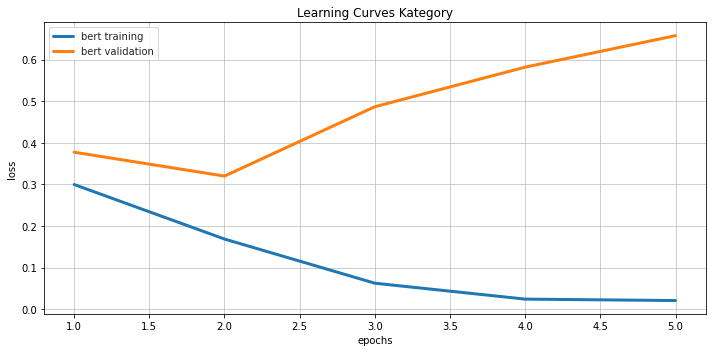

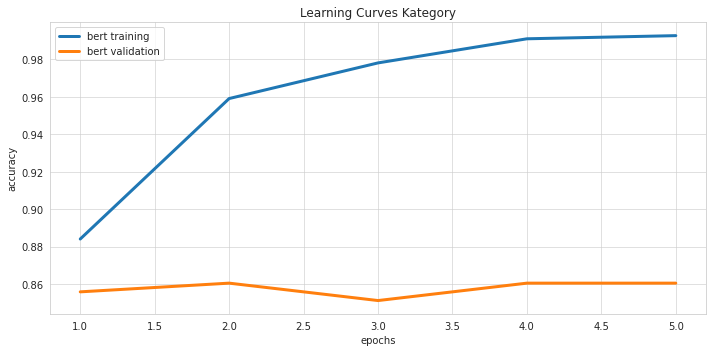

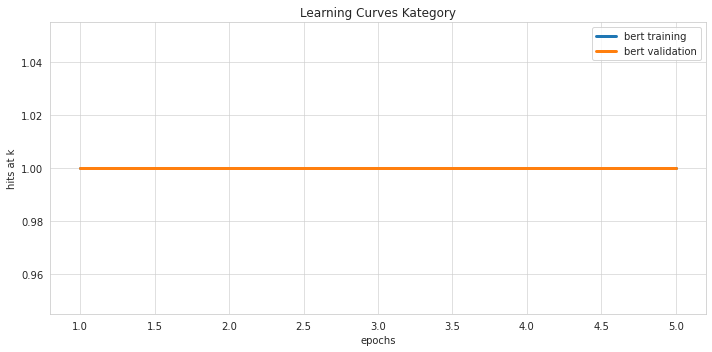

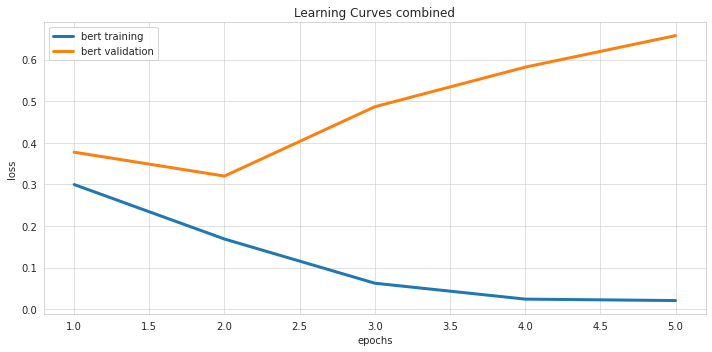

In [15]:
learning_curves(train_stats_bert, output_feature_name='label', model_names='bert')

In [16]:
#bert=LudwigModel.load('results/api_experiment_bert/model')

In [17]:
predictions, _ = bert.predict(test)

In [18]:
predictions['Kategory_predictions'].value_counts()

Another    534
3          466
Name: Kategory_predictions, dtype: int64

In [19]:
submission_start = pd.DataFrame({'id':test.id,
                           'Категория':predictions['Kategory_predictions'].values},
                          columns=['id', 'Категория'])
submission_start.to_csv('submission_start.csv', index=False, sep=',', encoding='utf-8')
submission_start['Категория'].value_counts()

Another    534
3          466
Name: Категория, dtype: int64

In [20]:
# Первое отсечение - убираем из трейна все верно предсказанные 3 (возможно - удалять все 3 при accuracy)

predictions, _ = bert.predict(train)
train['Kategory']=predictions['Kategory_predictions'].values
train1=train.loc[(train['Категория']!=3)|(train['Kategory']!='3')]
train1.to_csv('train1.csv', index=False, sep=',', encoding='utf-8')
train1['Категория'].value_counts()


0     478
16    149
8     139
4     108
3      59
10     48
7      27
1      25
11     19
5      12
13     11
6      10
15      7
9       5
14      4
2       3
12      1
Name: Категория, dtype: int64

In [21]:
# В усеченном трейне в целевой переменной оставляем лишь значения 0  и Another
train1['Kategory']=train1['Категория']
train1.loc[(train1['Kategory']!=0),"Kategory"]='Another'
train1['Kategory'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Another    627
0          478
Name: Kategory, dtype: int64

In [22]:
# Сразу сокращаем тест - убрав предсказанные 3
submission_krat=submission_start.loc[submission_start['Категория']=='Another']
test1= submission_krat.merge(test, how='left', on='id')
test1.to_csv('test1.csv', index=False, sep=',', encoding='utf-8')
test1['Категория'].value_counts()

Another    534
Name: Категория, dtype: int64

In [23]:
train1 = train1.reset_index(drop=True)
train1

,id,Message text,Текст Сообщения,Тематика,Ответственное лицо,Категория,Kategory
0,2240,Aggressive dogs. On the rainbow there is a flo...,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1,Another
1,596,At the intersection of Sosnovskaya and Beregov...,<p>На пересечении &nbsp;улиц Сосновская и Бере...,Нескошенная сорная растительность в местах общ...,Комитет дорожного хозяйства города Курска,3,Another
2,2833,A caustic and unhealthy smell from the quarrie...,Едкий и вредный для здоровья запах от карьеров...,Неприятные запахи,Комитет природных ресурсов Курской области,16,Another
3,1593,Good afternoon. At the stop `Ploshchad Rokosso...,<p>Добрый день.&nbsp;</p><p>На остановке `Площ...,Пешеходные переходы на дорогах в границах горо...,Комитет природных ресурсов Курской области,0,0
4,1900,"Hello, in the village of Stary Buzets, the roa...","Здравствуйте, в д. Старый Бузец уже 3 дня не ч...",Очистка от снега и наледи дорог в границах гор...,Администрация Железногорского района,0,0
...,...,...,...,...,...,...,...
1100,587,"Hello. In the Shchigrovsky district, in the Gr...","<p>Здравствуйте. В Щигровском районе, в Зелёно...",Плохое материально-техническое оснащение учреж...,Администрация Щигровского района,15,Another
1101,1356,12/22/21 in the evening there was a stink from...,<p>22.12.21 в вечернее время появилась вонь от...,Неприятные запахи,Комитет природных ресурсов Курской области,16,Another
1102,243,Good afternoon! I want to report such a proble...,<p>Добрый день! Хочу сообщить о такой проблеме...,Парковки на дорогах в границах городских округ...,Администрация города Курска,0,0
1103,1937,"Please roman Vladimirovich, soon here on a.d. ...","Пожалуйста роман Владимирович, в скором времен...",Нарушение дорожного покрытия (ямы) на дорогах...,Администрация города Курска,0,0


In [24]:
# Запускаем вторую обработку (настройки подравнять дополнительно)
config = {
    "input_features": [
        {
            "name": "Message text",
            "type": "text",
            'encoder': 'bert',
            'trainable': True,
        },

    ],
    "output_features": [
        {
            "name": "Kategory",
            "type": "category",
        }
    ],
        'training': {
        'batch_size': 8,
        'decay': True,      
        'trainable': True,
        'learning_rate': 0.000008, 
        'epochs': 7,
        'early_stop': 7,
        'validation_field': 'Kategory',
        'validation_metric': 'loss',
        'learning_rate_warmap_epoch': 6,
        
    },
        'preprocessing':{
        'split_probabilities': [0.9, 0.1, 0.0],
        'stratify': 'Kategory'}
}

In [25]:
bert1 = LudwigModel(config, logging_level=50,)

In [26]:
#bert1=LudwigModel.load('results/api_experiment_bert1_0/model')

In [27]:
%%time
print("Training Model...")
train_stats_bert1, _, _ = bert1.train(
    train1,   
    model_name='bert1',
    skip_save_processed_input=True,
    random_seed=39)

Training Model...


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


CPU times: user 7min 17s, sys: 3min 58s, total: 11min 15s
Wall time: 14min 4s


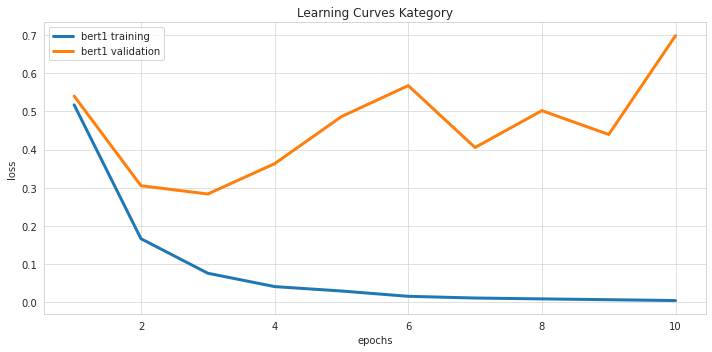

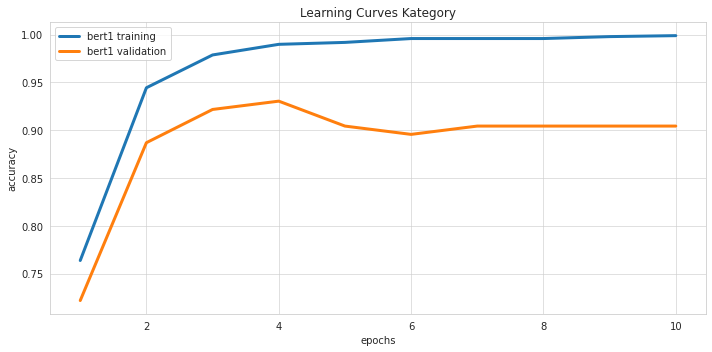

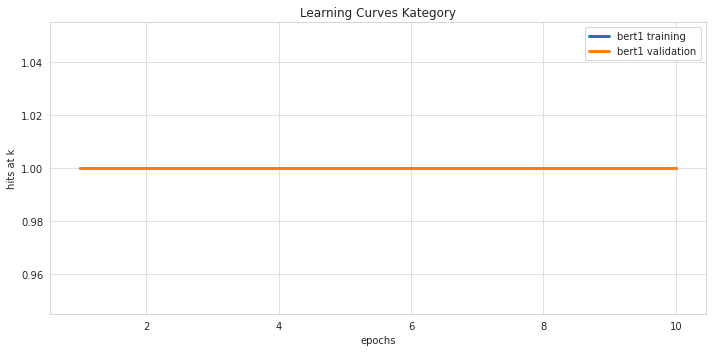

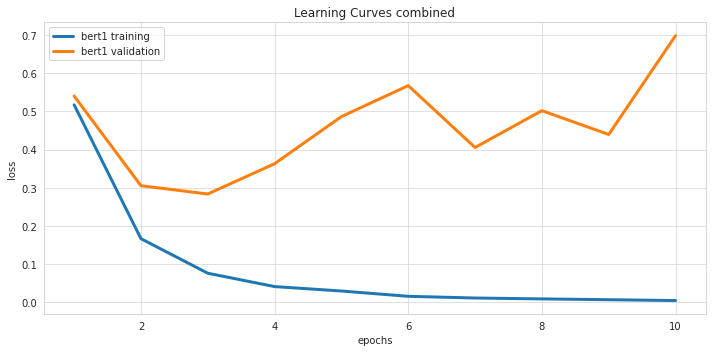

In [28]:
learning_curves(train_stats_bert1, output_feature_name='label', model_names='bert1')

In [29]:
predictions1, _ = bert1.predict(test1)

In [30]:
predictions1['Kategory_predictions'].value_counts()

Another    310
0          224
Name: Kategory_predictions, dtype: int64

In [31]:
submission1 = pd.DataFrame({'id':test1.id,
                           'Категория':predictions1['Kategory_predictions'].values},
                          columns=['id', 'Категория'])
submission1.to_csv('submission1.csv', index=False, sep=',', encoding='utf-8')
submission1['Категория'].value_counts()

Another    310
0          224
Name: Категория, dtype: int64

In [32]:
# Второе отсечение - убираем из трейна предсказанные значение 0 
predictions, _ = bert1.predict(train1)
train1['Kategory']=predictions['Kategory_predictions'].values
train2=train1.loc[(train1['Категория']!=0)|(train1['Kategory']!='0')]
train2.to_csv('train2.csv', index=False, sep=',', encoding='utf-8')
train2['Категория'].value_counts()

16    149
8     139
4     108
3      59
10     48
7      27
1      25
11     19
5      12
0      11
13     11
6      10
15      7
9       5
14      4
2       3
12      1
Name: Категория, dtype: int64

In [33]:
#train2 = pd.read_csv('train2.csv')
#submission_start=pd.read_csv('submission_start.csv')
#submission1=pd.read_csv('submission1.csv')
#submission2=pd.read_csv('submission2.csv')

In [34]:
# В усеченном трейне в целевой переменной оставляем значения 16,8,4 и Another
train2['Kategory']=train2['Категория']
train2.loc[(train2['Категория']!=16)&(train2['Категория']!=8)&(train2['Категория']!=4),"Kategory"]='Another'
train2['Kategory'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Another    242
16         149
8          139
4          108
Name: Kategory, dtype: int64

In [35]:
# Сразу сокращаем тест - убрав предсказанные 0
submission_krat=submission1.loc[submission1['Категория']=='Another']
test2= submission_krat.merge(test, how='left', on='id')
test2.to_csv('test2.csv', index=False, sep=',', encoding='utf-8')
test2['Категория'].value_counts()


Another    310
Name: Категория, dtype: int64

In [36]:
#test2 = pd.read_csv('test2.csv')

In [37]:
train2 = train2.reset_index(drop=True)
train2

,id,Message text,Текст Сообщения,Тематика,Ответственное лицо,Категория,Kategory
0,2240,Aggressive dogs. On the rainbow there is a flo...,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1,Another
1,596,At the intersection of Sosnovskaya and Beregov...,<p>На пересечении &nbsp;улиц Сосновская и Бере...,Нескошенная сорная растительность в местах общ...,Комитет дорожного хозяйства города Курска,3,Another
2,2833,A caustic and unhealthy smell from the quarrie...,Едкий и вредный для здоровья запах от карьеров...,Неприятные запахи,Комитет природных ресурсов Курской области,16,16
3,304,Old garages next to star 11a. Bottles of rubbi...,<p>Старые гаражи рядом с звездной 11а. Вокруг ...,Неудовлетворительная уборка улиц и тротуаров,Администрация города Курска,3,Another
4,1381,There is no road lighting from the beginning o...,<p>Отсутствует освещение дороги&nbsp;</p><p>от...,Неработающее наружное освещение,Комитет жилищно-коммунального хозяйства города...,3,Another
...,...,...,...,...,...,...,...
633,594,I ask you to please install an ATM of VTB and ...,<p>Прошу Вас пожалуйста установить банкомат ВТ...,"Неудовлетворительное качество товара, оказания...",Администрация города Железногорска,13,Another
634,1743,Please clear out the dump. They arranged a dum...,<p>Прошу Вас ликвидировать свалку. &nbsp;Устро...,Не соответствующий установленным нормам сбор и...,Комитет городского хозяйства города Курска,3,Another
635,587,"Hello. In the Shchigrovsky district, in the Gr...","<p>Здравствуйте. В Щигровском районе, в Зелёно...",Плохое материально-техническое оснащение учреж...,Администрация Щигровского района,15,Another
636,1356,12/22/21 in the evening there was a stink from...,<p>22.12.21 в вечернее время появилась вонь от...,Неприятные запахи,Комитет природных ресурсов Курской области,16,16


In [38]:
# Запускаем третью обработку (настройки подравнять дополнительно)
config = {
    "input_features": [
        {
            "name": "Message text",
            "type": "text",
            'encoder': 'bert',
            #'trainable': True,        
        },

    ],
    "output_features": [
        {
            "name": "Kategory",
            "type": "category",
        }
    ],
        'training': {
        'batch_size': 8,
        'decay': True,       
        'trainable': True,
        'learning_rate': 0.0000055,
        'epochs': 11,
        'early_stop': 11,
        'validation_field': 'Kategory',
        'validation_metric': 'loss', 
        'learning_rate_warmap_epoch': 3,
        
    },
        'preprocessing':{
        'split_probabilities': [1.0, 0.0, 0.0],
        'stratify': 'Kategory'}
}

In [39]:
bert2 = LudwigModel(config, logging_level=50,)

In [40]:
%%time
print("Training Model...")
train_stats_bert2, _, _ = bert2.train(
    train2,   
    model_name='bert2',
    skip_save_processed_input=True,
    random_seed=33)

Training Model...


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


CPU times: user 5min 15s, sys: 2min 55s, total: 8min 10s
Wall time: 10min 26s


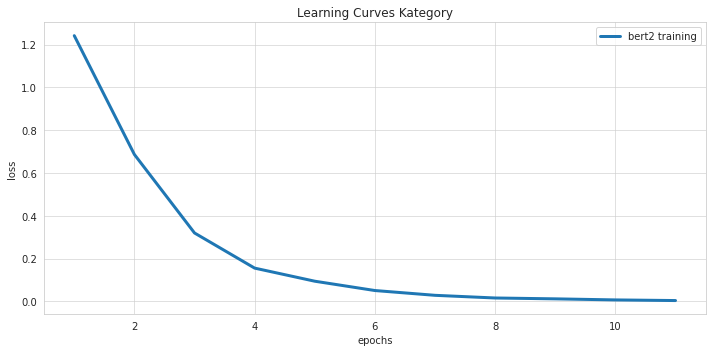

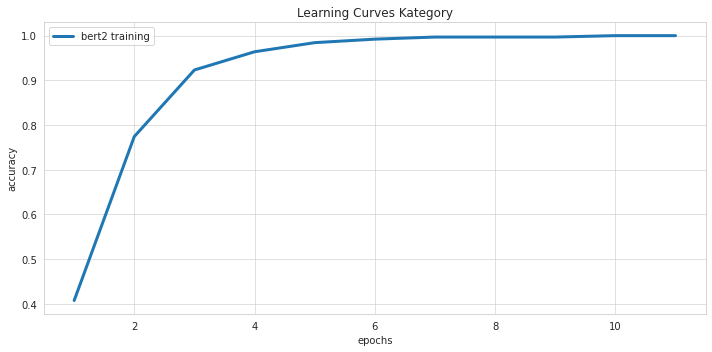

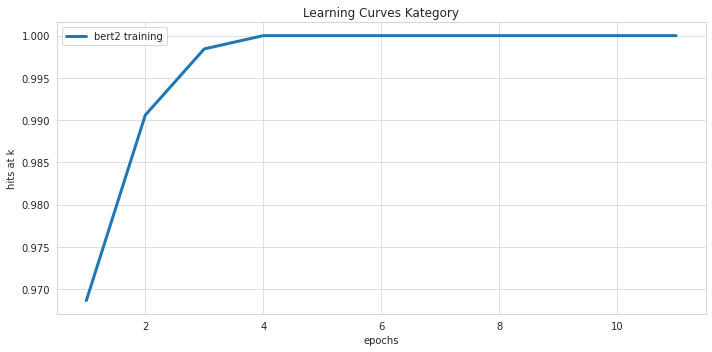

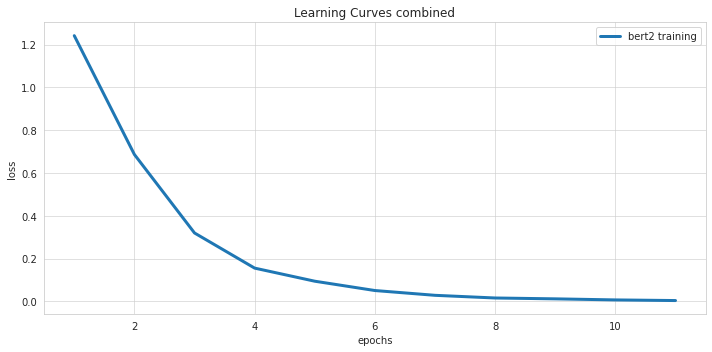

In [41]:
learning_curves(train_stats_bert2, output_feature_name='label', model_names='bert2')

In [42]:
predictions2, _ = bert2.predict(test2)

In [43]:
predictions2['Kategory_predictions'].value_counts()

Another    129
8           71
16          65
4           45
Name: Kategory_predictions, dtype: int64

In [44]:
submission2 = pd.DataFrame({'id':test2.id,
                           'Категория':predictions2['Kategory_predictions'].values},
                          columns=['id', 'Категория'])
submission2.to_csv('submission2.csv', index=False, sep=',', encoding='utf-8')
submission2['Категория'].value_counts()

Another    129
8           71
16          65
4           45
Name: Категория, dtype: int64

In [45]:
# Третье отсечение - убираем из трейна значения 16,8,4
train3=train2.loc[(train2['Категория']!=16)&(train2['Категория']!=8)&(train2['Категория']!=4)]
train3.to_csv('train3.csv', index=False, sep=',', encoding='utf-8')
train3['Категория'].value_counts()
# Оставлены все оставшиеся, обучение по полю Категория

3     59
10    48
7     27
1     25
11    19
5     12
13    11
0     11
6     10
15     7
9      5
14     4
2      3
12     1
Name: Категория, dtype: int64

In [46]:
train3['Kategory']=train3['Категория']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
# Сразу сокращаем тест - убрав предсказанные 16,8,4
submission_krat=submission2.loc[submission2['Категория']=='Another']
test3= submission_krat.merge(test, how='left', on='id')
test3.to_csv('test3.csv', index=False, sep=',', encoding='utf-8')
test3['Категория'].value_counts()

Another    129
Name: Категория, dtype: int64

In [48]:
train3 = train3.reset_index(drop=True)
train3

,id,Message text,Текст Сообщения,Тематика,Ответственное лицо,Категория,Kategory
0,2240,Aggressive dogs. On the rainbow there is a flo...,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1,1
1,596,At the intersection of Sosnovskaya and Beregov...,<p>На пересечении &nbsp;улиц Сосновская и Бере...,Нескошенная сорная растительность в местах общ...,Комитет дорожного хозяйства города Курска,3,3
2,304,Old garages next to star 11a. Bottles of rubbi...,<p>Старые гаражи рядом с звездной 11а. Вокруг ...,Неудовлетворительная уборка улиц и тротуаров,Администрация города Курска,3,3
3,1381,There is no road lighting from the beginning o...,<p>Отсутствует освещение дороги&nbsp;</p><p>от...,Неработающее наружное освещение,Комитет жилищно-коммунального хозяйства города...,3,3
4,2295,Please put me and my family on the waiting lis...,Прошу включить меня и мою семью в очередь на п...,Социальные льготы,Администрация города Курска,6,6
...,...,...,...,...,...,...,...
237,2456,Near the medical center `Doctor Petrov` (Pavlu...,Около медицинского центра `Доктор Петров` (ули...,Безнадзорные животные,Комитет городского хозяйства города Курска,1,1
238,1122,Please help to put things in order with walkin...,<p>Просим помочь навести порядок с &nbsp;выгул...,Безнадзорные животные,Комитет городского хозяйства города Курска,1,1
239,594,I ask you to please install an ATM of VTB and ...,<p>Прошу Вас пожалуйста установить банкомат ВТ...,"Неудовлетворительное качество товара, оказания...",Администрация города Железногорска,13,13
240,1743,Please clear out the dump. They arranged a dum...,<p>Прошу Вас ликвидировать свалку. &nbsp;Устро...,Не соответствующий установленным нормам сбор и...,Комитет городского хозяйства города Курска,3,3


In [49]:
# Запускаем последнюю обработку (настройки подравнять дополнительно)
config = {
    "input_features": [
        {
            "name": "Message text",
            "type": "text",
            'encoder': 'bert',
          # 'trainable': True,         
        },

    ],
    "output_features": [
        {
            "name": 'Kategory',
            "type": "category",
        }
    ],
        'training': {
        'batch_size': 4,
        'decay': True,     
        'trainable': True,
        'learning_rate': 0.0000075,
        'epochs': 13,
        'early_stop': 13,
        'validation_field': 'Kategory',
        'validation_metric': 'loss',
        'learning_rate_warmap_epoch': 3,
        
    },
        'preprocessing':{
        'split_probabilities': [1.0, 0.0, 0.0],
        'stratify': 'Kategory'}
}

In [50]:
bert3 = LudwigModel(config, logging_level=50,)

In [51]:
%%time
print("Training Model...")
train_stats_bert3, _, _ = bert3.train(
    train3,   
    model_name='bert3',
    skip_save_processed_input=True,
    random_seed=34)

Training Model...


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


CPU times: user 3min 13s, sys: 1min 31s, total: 4min 45s
Wall time: 6min 13s


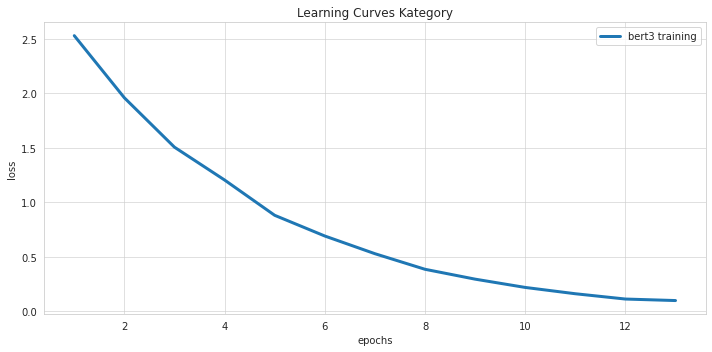

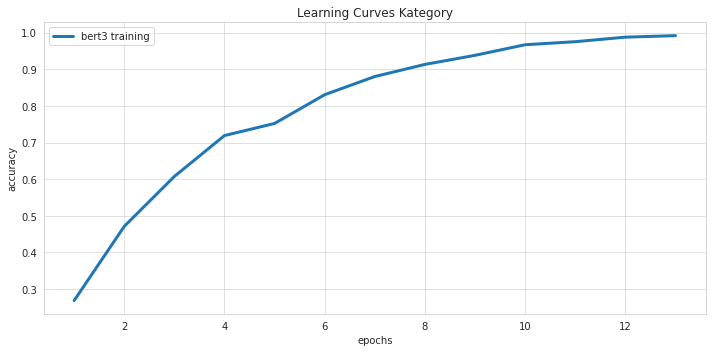

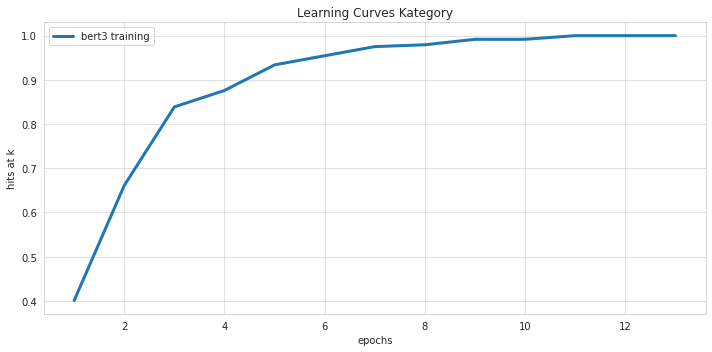

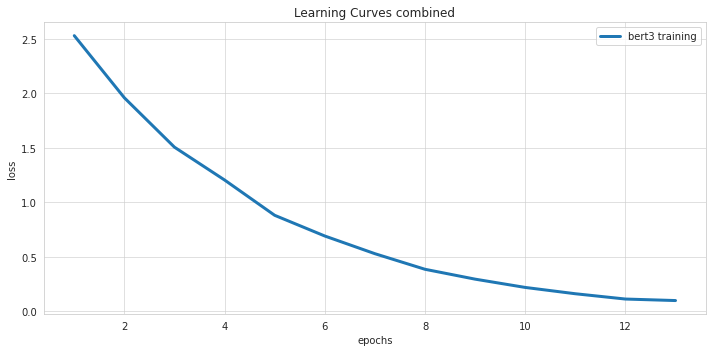

In [52]:
learning_curves(train_stats_bert3, output_feature_name='label', model_names='bert3')

In [53]:
predictions3, _ = bert3.predict(test3)

In [54]:
predictions3['Kategory_predictions'].value_counts()

10    44
3     21
1     15
5     14
7     10
11     8
13     7
0      7
6      1
9      1
2      1
Name: Kategory_predictions, dtype: int64

In [55]:
submission3 = pd.DataFrame({'id':test3.id,
                           'Категория':predictions3['Kategory_predictions'].values},
                          columns=['id', 'Категория'])
submission3.to_csv('submission3.csv', index=False, sep=',', encoding='utf-8')
submission3['Категория'].value_counts()

10    44
3     21
1     15
5     14
7     10
11     8
13     7
0      7
6      1
9      1
2      1
Name: Категория, dtype: int64

In [56]:
submission_start['Категория'].value_counts()

Another    534
3          466
Name: Категория, dtype: int64

In [57]:
# Итак - получены предсказания
# submission_start - предсказания 3
# submission1 - предсказания 0 и 3
# submission2 - предсказания 16,10,4,8
# submission3 - предсказания всех остальных
# объединяем
submission_start=submission_start.loc[submission_start['Категория']!='Another']
submission1=submission1.loc[submission1['Категория']!='Another']
submission2=submission2.loc[submission2['Категория']!='Another']
submission_all=pd.concat([submission_start,submission1,submission2,submission3],ignore_index=True)
submission_all['Категория'].value_counts()

3     487
0     231
8      71
16     65
4      45
10     44
1      15
5      14
7      10
11      8
13      7
6       1
9       1
2       1
Name: Категория, dtype: int64

In [58]:
# Объединяем с тестом по ID
submission_all= test.merge(submission_all, how='left', on='id')

In [59]:
submission_all=submission_all[['id','Категория']]

In [60]:
submission_all

,id,Категория
0,843,3
1,1422,3
2,2782,3
3,2704,3
4,1,8
...,...,...
995,2619,16
996,2518,3
997,2524,0
998,1577,4


In [61]:
submission_all.to_csv('submission_all_ep13_b4_lr75.csv', index=False, sep=',', encoding='utf-8')